In [1]:
using Distributions
using Plots

# Exercise 1.2

Show that the error probability is reduced by the use of $R_3$ by computing the error probability of this code for a binary symmetric channel with noise level $f$.

When using $R_3$, decoding errors only happen if 2 or 3 bits flip.

The binomial distribution tells us how likely $k$ bit flips are in $n$ bits, with noise level $f$.

$
binomial(k|n,f) = {n \choose k} \ f^k \ (1-f)^{n-k}
$

So the probability of 2 or 3 bits flipping is: $binomial(2|3,f) + binomial(3|3,f)$

$
binomial(2|3,f) + binomial(3|3,f)
\\
= {3 \choose 2} \ f^2 \ (1-f)^{3-2} + {3 \choose 3} \ f^3 \ (1-f)^{3-3}
\\
= 3f^2 \ (1-f) + f^3
\\
= 3f^2 - 3f^3 + f^3
\\
= 3f^2 - 2f^3
$

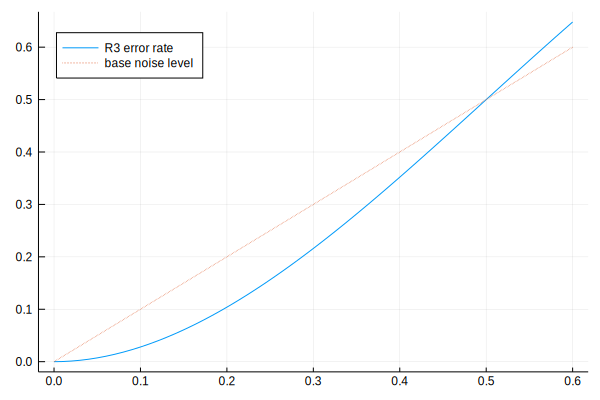

In [2]:
domain = 0:0.01:0.6
plot(domain, f -> 3f^2 - 2f^3, label="R3 error rate", legend=:topleft)
plot!(domain, f -> f, label="base noise level", linestyle=:dot)

Note: A noise level of $f = 0.5$ would mean the channel is completely random.

# Exercise 1.3

The probability of error of $R_N$ is:

$$
p_b = \sum_{n=(N+1)/2}^N \ {N \choose n} \ f^n \ (1-f)^{N-n}
$$

Assuming $f = 0.1$, which of the terms in this sum is the biggest? How much bigger is it than the second-biggest term?

It appears:

$$
\lim_{N \to \infty}
\frac{
    {N \choose (N+1)/2}
}{
    {N \choose ((N+1)/2)+1}
}
= 1
$$

In [3]:
map(1:2:51) do N
    n = Int((N+1)/2)
    b_max = binomial(N, n)
    b_next = binomial(N, n+1)
    N, b_max / b_next
end

26-element Array{Tuple{Int64,Float64},1}:
 (1, Inf)                
 (3, 3.0)                
 (5, 2.0)                
 (7, 1.6666666666666667) 
 (9, 1.5)                
 (11, 1.4)               
 (13, 1.3333333333333333)
 (15, 1.2857142857142858)
 (17, 1.25)              
 (19, 1.2222222222222223)
 (21, 1.2)               
 (23, 1.1818181818181819)
 (25, 1.1666666666666667)
 (27, 1.1538461538461537)
 (29, 1.1428571428571428)
 (31, 1.1333333333333333)
 (33, 1.125)             
 (35, 1.1176470588235294)
 (37, 1.1111111111111112)
 (39, 1.105263157894737) 
 (41, 1.1)               
 (43, 1.0952380952380953)
 (45, 1.0909090909090908)
 (47, 1.0869565217391304)
 (49, 1.0833333333333333)
 (51, 1.08)              

It appears:

$$
\lim_{n \to \infty}
\frac{
    f^n + (1-f)^{N-n}
}{
    f^{n+1} + (1-f)^{N-(n+1)}
}
= f^{-1} \ (1-f)
$$

In [4]:
f = 0.1
map(1:2:31) do N
    n = Int((N+1)/2)
    num = f^n * (1-f)^(N-n)
    den = f^(n+1) * (1-f)^(N-(n+1))
    num / den
end

16-element Array{Float64,1}:
 8.999999999999998
 9.0              
 9.000000000000002
 9.0              
 8.999999999999998
 9.0              
 8.999999999999998
 9.0              
 9.0              
 8.999999999999998
 9.0              
 8.999999999999998
 9.0              
 9.0              
 9.0              
 8.999999999999998

In [5]:
f^-1 * (1-f)

9.0

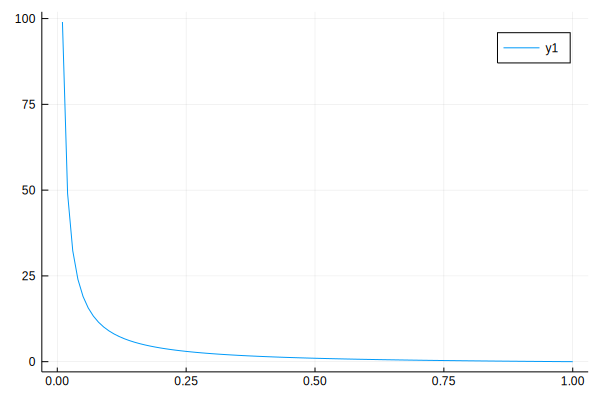

In [6]:
plot(0:0.01:1, f -> f^-1 * (1-f))

It appears that the sum $p_b$ is dominated by the largest term for small values of $f$. When $f = 0.1$ the largest term is about 9 times larger than the second largest term.

When $f = 0.1$, how many repetitions are required to get the error rate down to $10^{-15}$?

It appears:

$$
\lim_{N \to \infty}
\frac{
    {N+2 \choose (N+3)/2}
}{
    {N \choose (N+1)/2}
}
= 4
$$

In [7]:
binomial_terms = map(n -> binomial(Int(n), Int((n+1)/2)), 1:2:51)

26-element Array{Int64,1}:
               1
               3
              10
              35
             126
             462
            1716
            6435
           24310
           92378
          352716
         1352078
         5200300
        20058300
        77558760
       300540195
      1166803110
      4537567650
     17672631900
     68923264410
    269128937220
   1052049481860
   4116715363800
  16123801841550
  63205303218876
 247959266474052

In [8]:
binomial_growth = map(i -> binomial_terms[i+1] / binomial_terms[i], 1:length(binomial_terms)-1)

25-element Array{Float64,1}:
 3.0               
 3.3333333333333335
 3.5               
 3.6               
 3.6666666666666665
 3.7142857142857144
 3.75              
 3.7777777777777777
 3.8               
 3.8181818181818183
 3.8333333333333335
 3.8461538461538463
 3.857142857142857 
 3.8666666666666667
 3.875             
 3.8823529411764706
 3.888888888888889 
 3.8947368421052633
 3.9               
 3.9047619047619047
 3.909090909090909 
 3.9130434782608696
 3.9166666666666665
 3.92              
 3.923076923076923 

In [9]:
scatter(binomial_growth, label="binomial growth", legend=:bottomright)
scatter!(ones(length(b_growth)) * 4, label="4")

UndefVarError: UndefVarError: b_growth not defined

${N+2 \choose n+1}$ is about 4 times larger than ${N \choose n}$.

For $f = 0.1$, $f^1\ (1-f)^{2-1}$ divides by about 11 for $R_{N+2}$.

So each additional $2N$ in $R_N$ multiplies the error rate by about $4/11$.

We are looking for an error rate of $10^{-15}$.

In [10]:
estimate_r(f, target_error_rate) = log(4 * f * (1-f), target_error_rate) * 2

@time estimate_r(0.1, 10^-15)

  0.014414 seconds (8.44 k allocations: 483.505 KiB)


67.61363327915772

It would take roughly $R_{67}$ to reach $10^{-15}$ error rate.

Let's just brute force it.

In [11]:
function error_rate(f, r_n)
    sum(pdf.(Binomial(r_n, f), n) for n in (r_n+1)/2:r_n)
end

@time error_rate(0.1, 3)

  0.114932 seconds (225.86 k allocations: 11.012 MiB)


0.028000000000000008

In [12]:
function calculate_r(f, target_error_rate)
    for r_n in 1:2:1001
        if error_rate(f, r_n) <= target_error_rate
            return r_n
        end
    end
end

@time calculate_r(0.1, 10^-15)

  0.025502 seconds (32.09 k allocations: 1.858 MiB)


63

The exact answer is $R_{63}$.

Let's try some other numbers for fun.

In [13]:
@time estimate_r(0.2, 10^-15)

  0.000050 seconds (6 allocations: 192 bytes)


154.7827673777426

In [14]:
@time calculate_r(0.2, 10^-15)

  0.000605 seconds (5 allocations: 176 bytes)


141

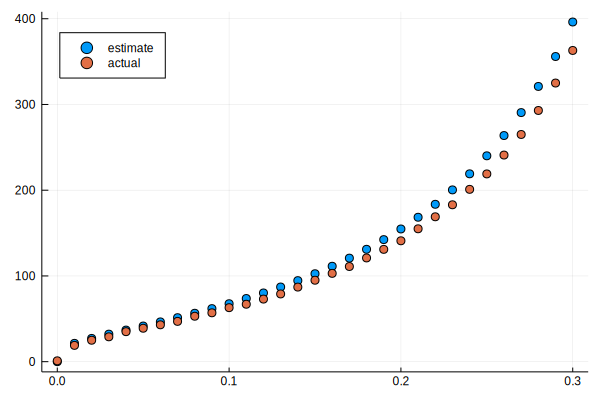

In [15]:
scatter(0:0.01:0.3, f -> estimate_r(f, 10^-15), label="estimate", legend=:topleft)
scatter!(0:0.01:0.3, f -> calculate_r(f, 10^-15), label="actual")